# Import Libraries:

In [232]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Indian Cuisine consists of a variety of regional and traditional cuisines native to the Indian Subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, cultural choices and traditions.

In [233]:
data=pd.read_csv("indian_food.csv")
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


The dataset consists of about 255 Indian dishes and 9 columns associated with each of them.

The 9 columns are as follows:-

name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

The presence of -1 in any of the columns indicates NaN value.

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [235]:
data.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [236]:
data.shape

(255, 9)

In [237]:
data.dtypes

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

In [238]:
#unique values
columns_to_check = ['diet', 'course', 'flavor_profile', 'state', 'region']
for column in columns_to_check:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}' column: {unique_values}")

Unique values in 'diet' column: ['vegetarian' 'non vegetarian']
Unique values in 'course' column: ['dessert' 'main course' 'starter' 'snack']
Unique values in 'flavor_profile' column: ['sweet' 'spicy' 'bitter' '-1' 'sour']
Unique values in 'state' column: ['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' '-1' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']
Unique values in 'region' column: ['East' 'West' 'North' '-1' 'North East' 'South' 'Central' nan]


In [239]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

# Missing values

In [240]:
data[data.duplicated("course")]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [241]:
data[data['prep_time']==-1].shape

(30, 9)

In [242]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [243]:
for col in data.columns:
    data[col] = data[col].replace(-1, np.nan)  # Replace numeric -1 with NaN
    data[col] = data[col].replace('-1', np.nan)  # Replace string '-1' with NaN

In [244]:
data.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

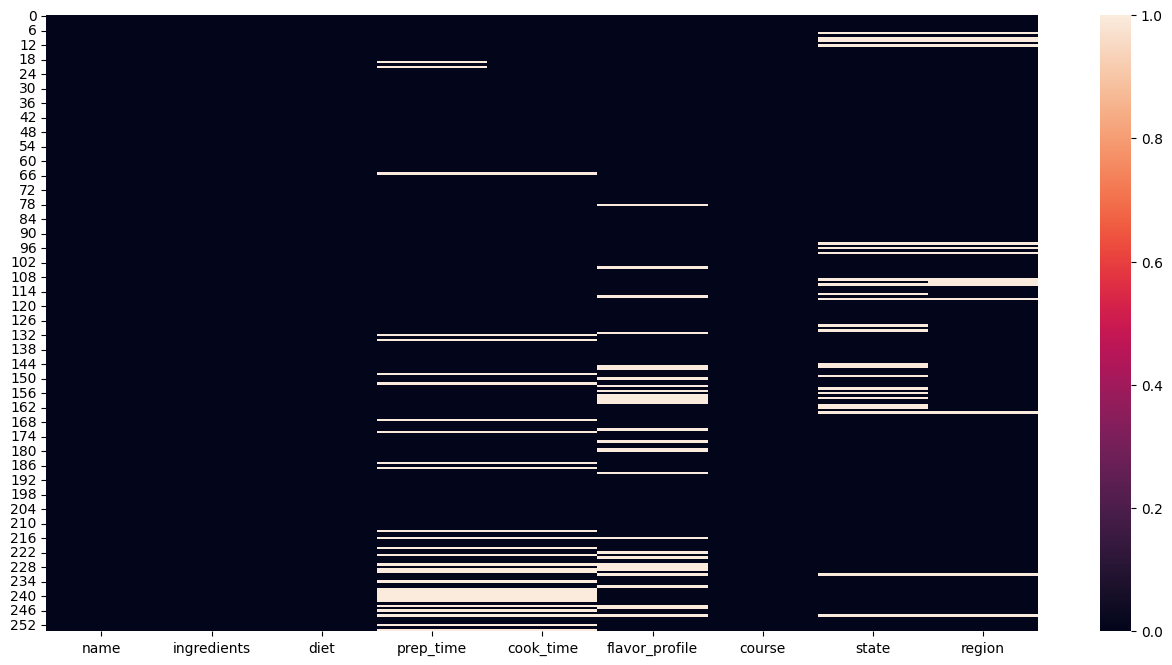

In [245]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isna())
plt.show()

In [246]:
data[data['state'].isna()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10.0,20.0,sweet,dessert,NaN,NaN
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10.0,40.0,sweet,dessert,NaN,NaN
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10.0,40.0,sweet,dessert,NaN,NaN
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20.0,30.0,sweet,dessert,NaN,NaN
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40.0,20.0,spicy,main course,NaN,NaN
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45.0,25.0,sweet,dessert,NaN,NaN
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10.0,20.0,spicy,main course,NaN,NaN
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15.0,2.0,spicy,snack,NaN,NaN
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5.0,5.0,spicy,snack,NaN,NaN
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15.0,90.0,spicy,main course,NaN,North


In [247]:
data['prep_time'].mean()

35.38666666666666

In [248]:
data['cook_time'].mean()

38.91189427312775

In [249]:
data['flavor_profile'].mode()

0    spicy
Name: flavor_profile, dtype: object

In [250]:
data['region'].mode()

0    West
Name: region, dtype: object

In [251]:
data['state'].mode()

0    Gujarat
Name: state, dtype: object

In [252]:
data['cook_time'].fillna(38.91, inplace=True)
data['prep_time'].fillna(35.38, inplace=True)
data['state'].fillna("Gujarat", inplace=True)
data['flavor_profile'].fillna("spicy", inplace=True)
data['region'].fillna("West", inplace=True)

In [253]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [254]:
data['prep_time'].min()

5.0

In [255]:
data['prep_time'].max()

500.0

In [256]:
data[data['prep_time'] == 5]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5.0,5.0,sweet,dessert,Punjab,North
38,Bandar laddu,"Besan, jaggery, cardamom powder, ghee, cashews...",vegetarian,5.0,35.0,sweet,dessert,Andhra Pradesh,South
45,Mysore pak,"Besan flour, semolina, mung bean, jaggery, coc...",vegetarian,5.0,20.0,sweet,dessert,Karnataka,South
49,Pongal,"Rice, jaggery, cashews, ghee",vegetarian,5.0,20.0,sweet,dessert,Tamil Nadu,South
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5.0,15.0,spicy,main course,Nagaland,North East
69,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5.0,20.0,spicy,main course,Punjab,North
70,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5.0,40.0,spicy,main course,Punjab,North
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5.0,5.0,spicy,snack,Gujarat,West
143,Kuzhambu,"Pearl onions, urad dal, drumsticks, tomato, cu...",vegetarian,5.0,30.0,spicy,main course,Tamil Nadu,South
147,Papadum,"Lentils, black pepper, vegetable oil",vegetarian,5.0,5.0,spicy,snack,Kerala,South


In [257]:
data[data['prep_time'] == 500]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500.0,120.0,spicy,main course,Punjab,North


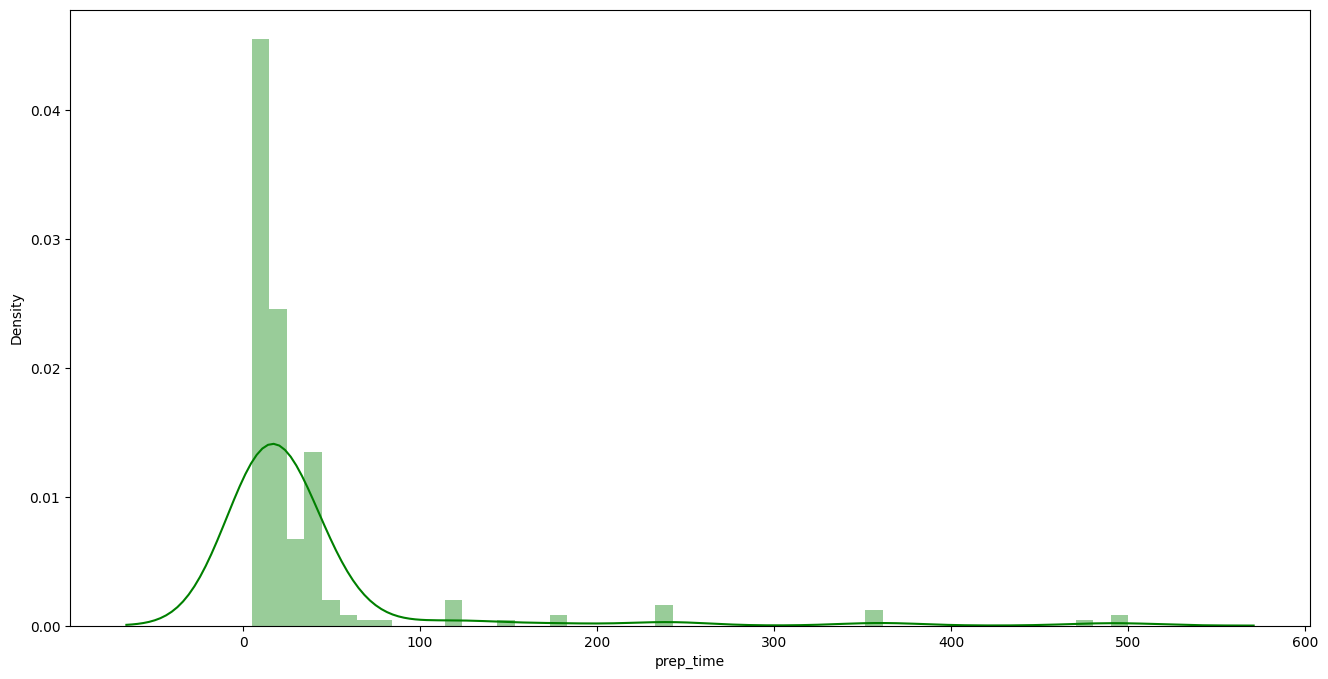

In [258]:
plt.figure(figsize=(16,8))
sns.distplot(data['prep_time'],color='g')
plt.show()

In [259]:
vegetarian_dishes = data[data['diet'] == 'vegetarian']
vegetarian_dishes[['name', 'state', 'prep_time', 'cook_time']]

,name,state,prep_time,cook_time
0,Balu shahi,West Bengal,45.00,25.00
1,Boondi,Rajasthan,80.00,30.00
2,Gajar ka halwa,Punjab,15.00,60.00
3,Ghevar,Rajasthan,15.00,30.00
4,Gulab jamun,West Bengal,15.00,40.00
...,...,...,...,...
250,Til Pitha,Assam,5.00,30.00
251,Bebinca,Goa,20.00,60.00
252,Shufta,Jammu & Kashmir,35.38,38.91
253,Mawa Bati,Madhya Pradesh,20.00,45.00


In [260]:
spicy_dishes = data[data['flavor_profile'] == 'spicy']
spicy_dishes[['name', 'state', 'prep_time', 'cook_time']]

,name,state,prep_time,cook_time
64,Maach Jhol,Assam,10.00,40.00
65,Pork Bharta,Tripura,35.38,38.91
67,Galho,Nagaland,5.00,15.00
68,Aloo gobi,Punjab,10.00,20.00
69,Aloo tikki,Punjab,5.00,20.00
...,...,...,...,...
244,Pakhala,Odisha,35.38,38.91
245,Pani Pitha,Assam,10.00,20.00
247,Prawn malai curry,West Bengal,15.00,50.00
248,Red Rice,Gujarat,35.38,38.91


course
main course    129
dessert         85
snack           39
starter          2
Name: count, dtype: int64


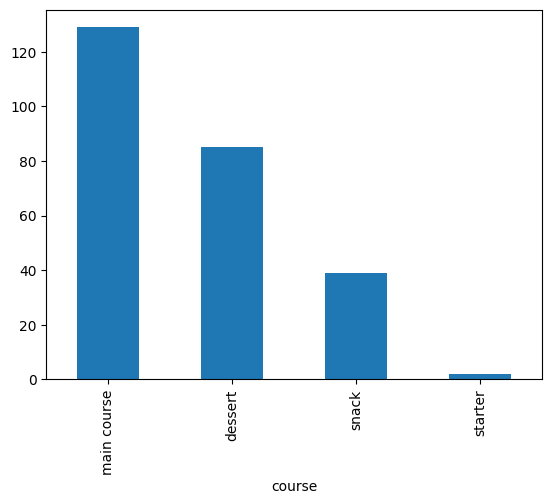

In [261]:
course_counts=data['course'].value_counts()
print(course_counts)
course_counts.plot(kind='bar')
plt.show()

flavor_profile
spicy     162
sweet      88
bitter      4
sour        1
Name: count, dtype: int64


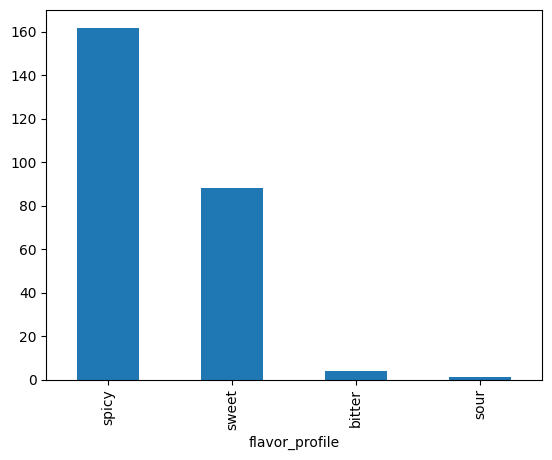

In [262]:
# Count the occurrences of each flavor profile
flavor_profile_counts = data['flavor_profile'].value_counts()
print(flavor_profile_counts)

# Visualize the distribution using a bar chart
flavor_profile_counts.plot(kind='bar')
plt.show()

diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64

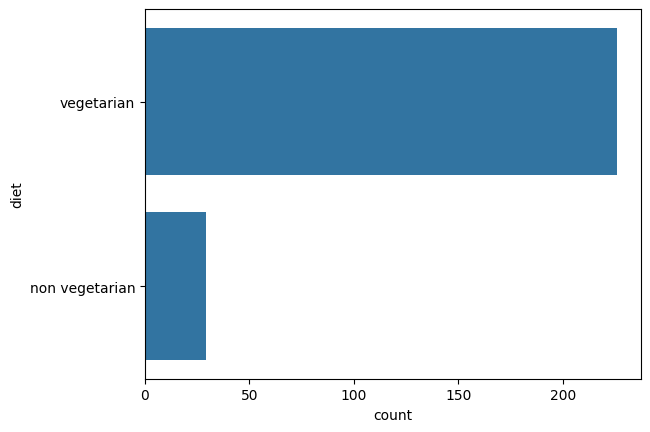

In [263]:
sns.countplot(data['diet'])
data['diet'].value_counts()

state
Gujarat            59
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: count, dtype: int64

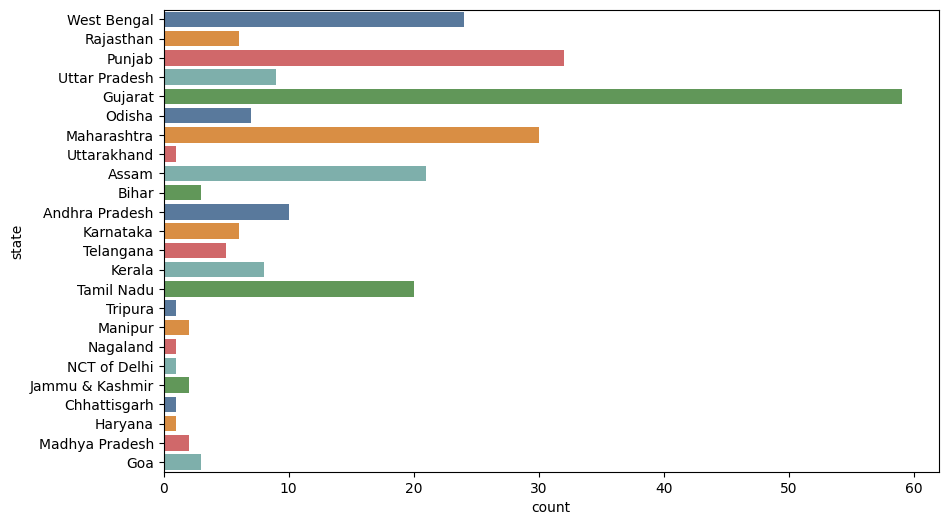

In [264]:
palette = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]
plt.figure(figsize=(10,6))
sns.countplot(data['state'],palette=palette)
data['state'].value_counts()

In [265]:
data[data['state']=='Andhra Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
37,Ariselu,"Rice flour, jaggery, ghee",vegetarian,15.0,75.0,sweet,dessert,Andhra Pradesh,South
38,Bandar laddu,"Besan, jaggery, cardamom powder, ghee, cashews...",vegetarian,5.0,35.0,sweet,dessert,Andhra Pradesh,South
42,Gavvalu,"Rice flour, sugar, salt, ghee, semolina",vegetarian,10.0,30.0,sweet,dessert,Andhra Pradesh,South
43,Kakinada khaja,"Wheat flour, sugar",vegetarian,10.0,30.0,sweet,dessert,Andhra Pradesh,South
47,Palathalikalu,"Rice flour, milk",vegetarian,10.0,25.0,sweet,dessert,Andhra Pradesh,South
48,Poornalu,"Chana dal, jaggery",vegetarian,240.0,60.0,sweet,dessert,Andhra Pradesh,South
50,Pootharekulu,"Rice flour, powdered sugar, ghee",vegetarian,10.0,60.0,sweet,dessert,Andhra Pradesh,South
54,Kajjikaya,"Rice flour, jaggery, coconut",vegetarian,40.0,15.0,sweet,dessert,Andhra Pradesh,South
124,Attu,"Whole wheat flour, arhar dal, ginger, kala jee...",vegetarian,150.0,25.0,spicy,snack,Andhra Pradesh,South
151,Pesarattu,"Green moong beans, rice flour",vegetarian,120.0,20.0,spicy,snack,Andhra Pradesh,South


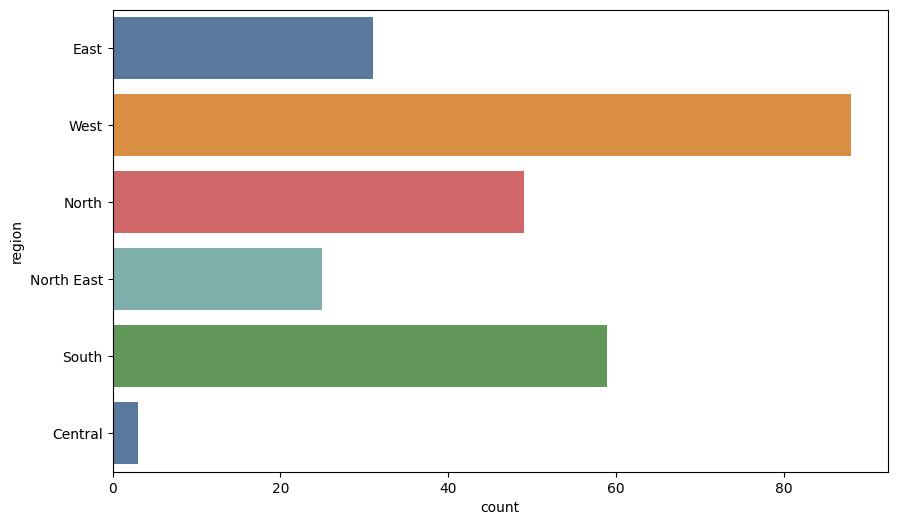

In [266]:
plt.figure(figsize=(10,6))
sns.countplot(data['region'],palette=palette)
plt.show()

# Region vs Diet

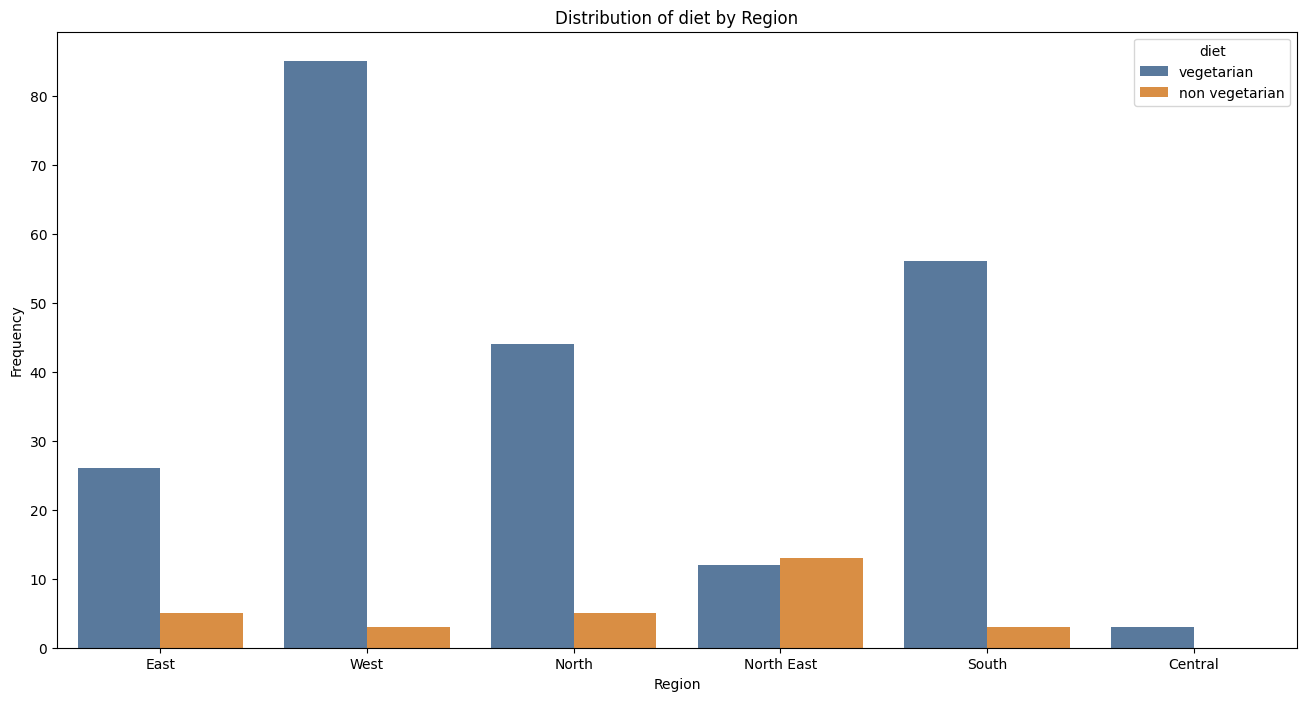

In [267]:
palette = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]

plt.figure(figsize=(16, 8))

# Create the countplot
sns.countplot(data=data, x='region', hue='diet', palette=palette)
plt.title("Distribution of diet by Region")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.show()

# Region vs course

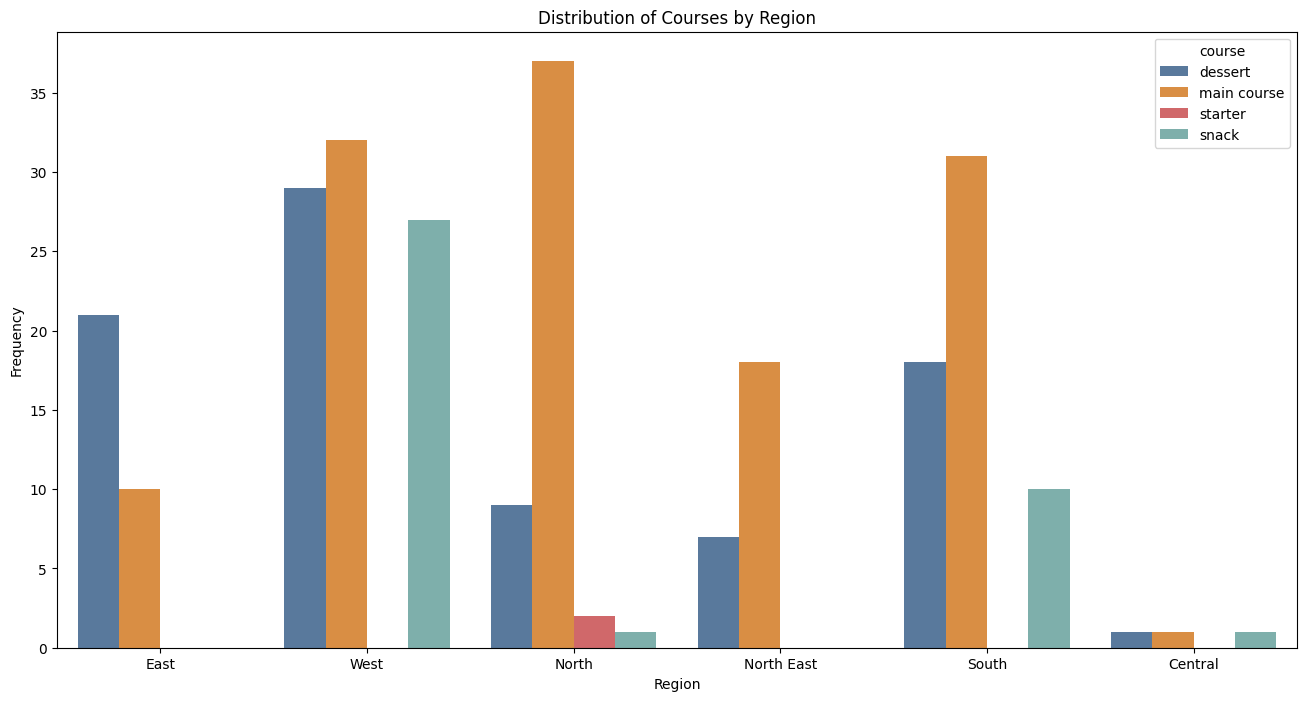

In [268]:
# Define the color palette
palette = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]

# Create the figure with the desired size
plt.figure(figsize=(16, 8))

# Create the countplot
sns.countplot(data=data, x='region', hue='course', palette=palette)
plt.title("Distribution of Courses by Region")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.show()

# course vs flavor

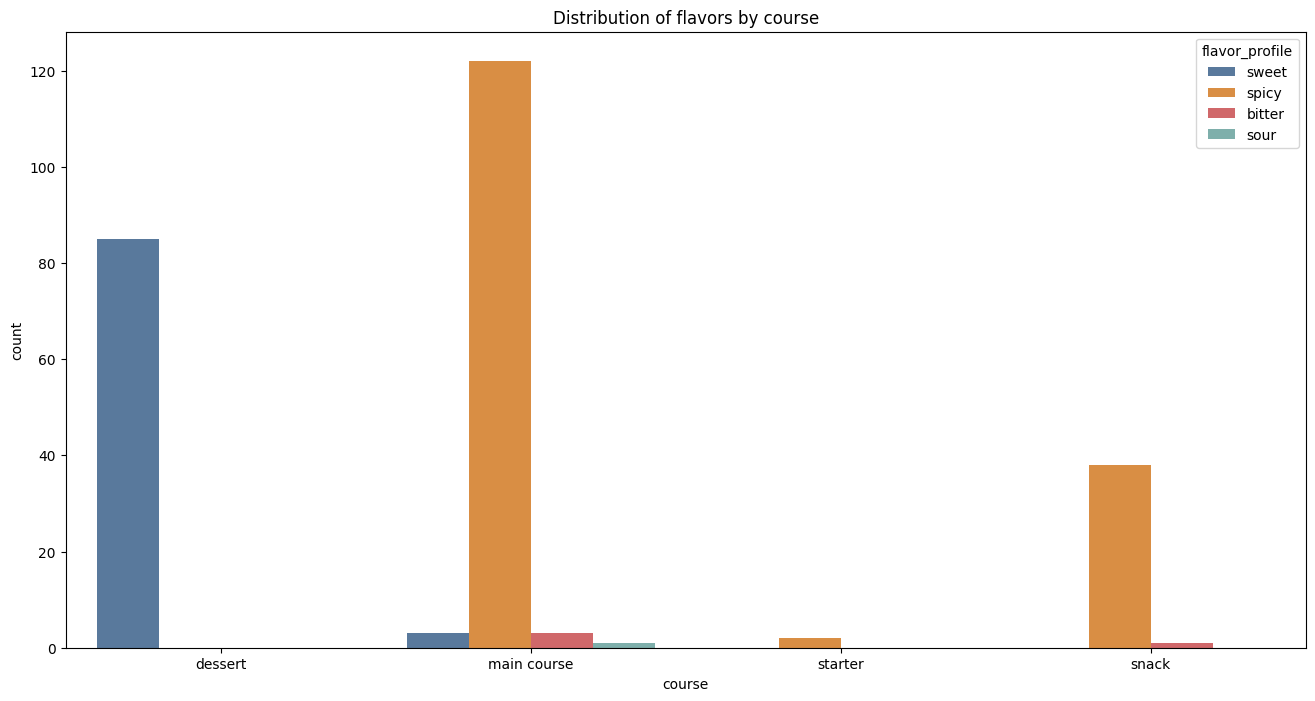

In [269]:
# Define the color palette
palette = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]

# Create the figure with the desired size
plt.figure(figsize=(16, 8))

# Create the countplot
sns.countplot(data=data, x='course', hue='flavor_profile', palette=palette)
plt.title("Distribution of flavors by course")
plt.xlabel("course")
plt.ylabel("count")
plt.show()

# Machine learning

In [270]:
# Encode Categorical Variables
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define Features (X) and Target (y)
X = data[['state']]   # Features
y = data['course']    # Target

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

Model: Logistic Regression
Accuracy: 0.45098039215686275
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.45      1.00      0.62        23
           2       0.00      0.00      0.00         8

    accuracy                           0.45        51
   macro avg       0.15      0.33      0.21        51
weighted avg       0.20      0.45      0.28        51

----------------------------------------
Model: Decision Tree
Accuracy: 0.5490196078431373
              precision    recall  f1-score   support

           0       0.52      0.60      0.56        20
           1       0.69      0.39      0.50        23
           2       0.47      0.88      0.61         8

    accuracy                           0.55        51
   macro avg       0.56      0.62      0.56        51
weighted avg       0.59      0.55      0.54        51

----------------------------------------
Model: Random Forest
Accuracy: 0.5490196078431373